# 02. 확률론

## 확률의 종류

* 빈도주의적 확률($Frequentist$ $probability$)
    * 특징
        * 모든 가능성을 지닌 경우의 수에 대한 원하는 경우의 수의 비
        * 일반적으로 우리가 생각하고 있는 확률

* 주관적 확률 ($Bayesian$ $probability$)
    * 특징
        * 주어진 증거 혹은 주어지지 않은 상태에서 해당 사건의 믿음의 정도
        * 모집단을 미리 확정짓지 않고 모수를 확률변수처럼 취급
        * 새로운 표본 데이터를 다시 출발점으로 가집니다
    * 구성요소
        * 사전확률($prior$)
            * 데이터를 보기 전의 가설의 확률
            * 배경지식이기 때문에 주관적일수 있습니다
        * 사후확률($posterior$)
            * 데이터를 확인한 이후의 가설확률
            * 구하고자 하는 확률
        * 우도($likelihood$)
            * 데이터가 가설에 포함될 확률
        * 증거요소($evidence$)
            * 어떤 가설에든 포함되는 데이터의 비율
            * 한정 상수라고도 합니다
            * 확률로 만들기 위해(정규화) 추가되는 값입니다.

$$P(w_j|x) = {p(x|w_j)P(w_j)\over p(x)}$$
$$p(x) = \sum_{j=1}^c {p(x|w_j)}P(w_j)$$
$$posterior = {likelihood \times prior \over evidence}$$

* 현수가 동전을 던져 앞면과 뒷면이 나올 확률을 구하고자 합니다. 두 사건이 동일한 확률을 가졌고 동전을 300회 던졌을때, 빈도주의적 확률 측면과 주관적 확률 측면에서 해당확률이 0.5에 근접함을 보이세요.

In [1]:
# 필요 라이브러리 임포트
import random
from scipy.stats import beta as Beta
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
# 데이터 생성
# dataset = ['앞' if random.randint(0, 1)==0 else '뒤' for x in range(300)]
dataset = '앞'*150 + '뒤'*150
dataset = ''.join(dataset)

### 빈도주의적 확률

In [69]:
# 빈도주의적 확률
for i in range(1, len(dataset)):
    if i==1 or i==10 or i==200 or i==len(dataset)-1:
        print("[count: {number}] 앞면이 나올 확률: {count}".format(number=i, count=round(dataset[:i+1].count('앞')/(i+1), 5)))

[count: 1] 앞면이 나올 확률: 1.0
[count: 10] 앞면이 나올 확률: 1.0
[count: 200] 앞면이 나올 확률: 0.74627
[count: 299] 앞면이 나올 확률: 0.5


### 주관주의적 확률

동전을 던저 앞면이 나올 확률을 $x$% 라고 할때 $x$의 확률 분포를 추정합니다.

In [4]:
# 우도함수 정의
def likelihood(data, hypo):
    '''우도를 구하는 함수.
    
    Args:
        data (str): 데이터, 앞 또는 뒤
        hypo (int): 동전을 던져 앞면이 나올 확률(백분율)
        
    Returns:
        float: 우도
    '''
    x = hypo
    if data == '앞':
        return x/100.0
    else:
        return 1-x/100.0

In [5]:
# 최대 사후 확률법(MAP, Maximum A Posteriori)
def MaximumAPosteriori(pmf):
    """ 가장 높은 확률의 값을 구하는 함수"""
    prob, val = max((prob, val) for val, prob in pmf.items())
    return prob, val

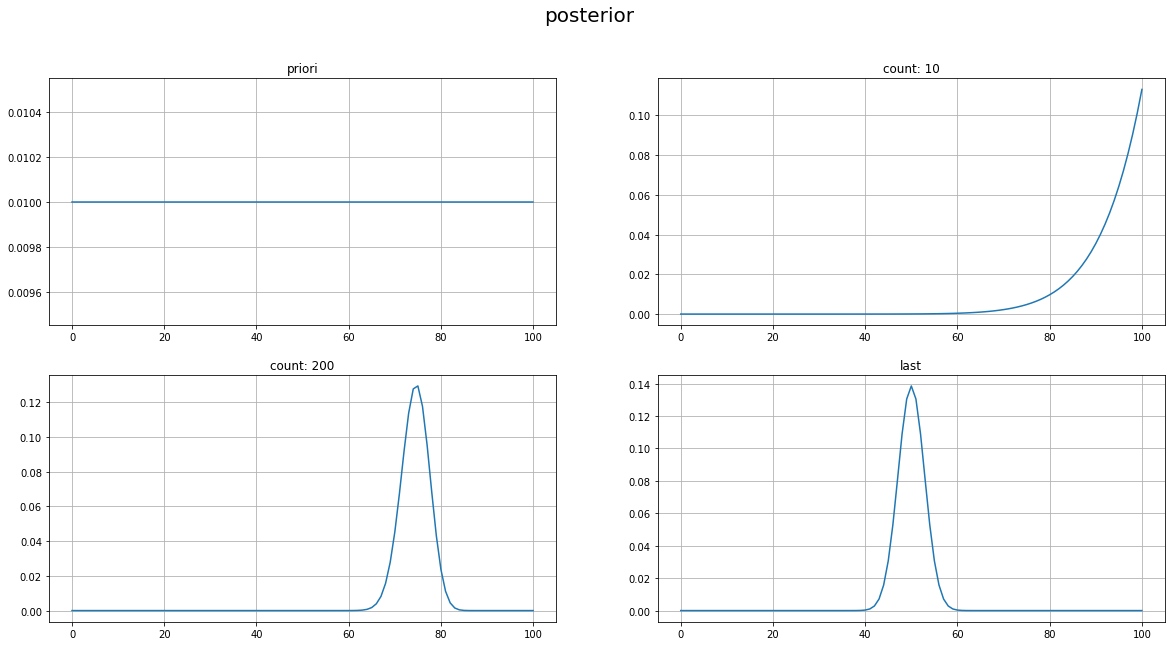

In [46]:
count = 0
plt.figure(figsize=(20, 10))
plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

# 초기화
# 사전에 해당 확률에 대한 사전정보가 없다고 가정
pmf = {}
for k in range(101):
    pmf[k] = 0.01
    
# 사전확률 시각화
plt.suptitle('posterior', size=20)
plt.subplot(2, 2, 1)
plt.title('priori')
plt.plot(pmf.keys(), pmf.values())
plt.grid(True)

for data in dataset:
    # 증거확률 구하기
    evidence = 0
    for hypo in pmf.keys():
        evidence += likelihood(data, hypo)*pmf[hypo]
    # 사후확률 = 사전확률 X 우도 / 증거확률    
    for hypo in pmf.keys():
        pmf[hypo] = likelihood(data, hypo)*pmf[hypo]/evidence
    
    # 시각화
    if count==10:
        plt.subplot(2, 2, 2)
        plt.title('count: 10')
        plt.plot(pmf.keys(), pmf.values())
        plt.grid(True)
    elif count==200:
        plt.subplot(2, 2, 3)
        plt.title('count: 200')
        plt.plot(pmf.keys(), pmf.values())
        plt.grid(True)
    elif count==len(dataset)-1:
        plt.subplot(2, 2, 4)
        plt.title('last')
        plt.plot(pmf.keys(), pmf.values())
        plt.grid(True)
    count += 1
plt.show()

In [72]:
prob, val = MaximumAPosteriori(pmf)
print("앞면이 나올 확률: {}%".format(val))

앞면이 나올 확률: 50%


### 베타분포의 활용

베이지안 추정은 사전정보를 활용할 수 있어 강력합니다

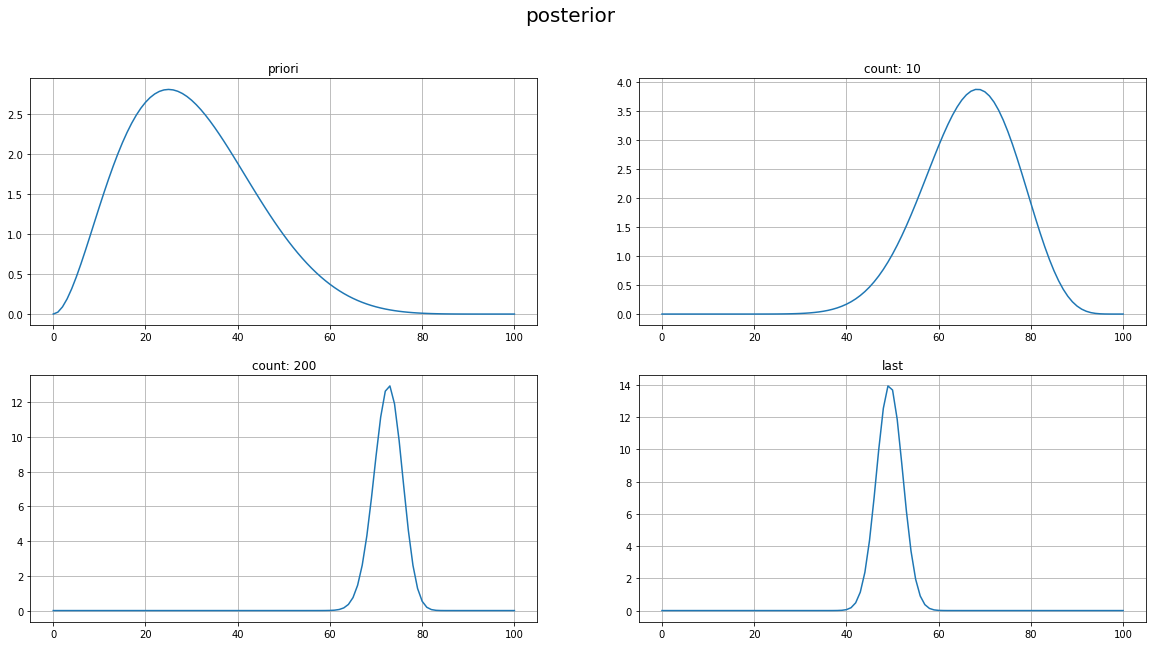

In [45]:
count = 0
plt.figure(figsize=(20, 10))
plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

# 초기화
# alpa가 3, beta가 7인 베타분포를 따른다는 사전정보가 있다고 가정
x = np.array([x for x in range(101)])
alpa, beta = 3, 7
b = Beta(alpa, beta)
pmf = {}
for k in range(101):
    pmf[k] = b.pdf(x/100)[k]
    
# 사전확률 시각화
plt.suptitle('posterior', size=20)
plt.subplot(2, 2, 1)
plt.title('priori')
plt.plot(pmf.keys(), pmf.values())
plt.grid(True)

for data in dataset:
    if data=='앞':
        alpa += 1
    else:
        beta += 1
    b = Beta(alpa, beta)
    for k in range(101):
        pmf[k] = b.pdf(x/100)[k]
    
    # 시각화
    if count==10:
        plt.subplot(2, 2, 2)
        plt.title('count: 10')
        plt.plot(pmf.keys(), pmf.values())
        plt.grid(True)
    elif count==200:
        plt.subplot(2, 2, 3)
        plt.title('count: 200')
        plt.plot(pmf.keys(), pmf.values())
        plt.grid(True)
    elif count==len(dataset)-1:
        plt.subplot(2, 2, 4)
        plt.title('last')
        plt.plot(pmf.keys(), pmf.values())
        plt.grid(True)
    count += 1
plt.show()

In [10]:
prob, val = MaximumAPosteriori(pmf)
print("앞면이 나올 확률: {}%".format(val))

앞면이 나올 확률: 49%


출처:

* Allen B. Downey. *Think Bayers: Baysian Statistics in Python*. O'RELLY, 2012
* Kevin Murphy. *Machine Learning: A Probabilistic Perspective*. MIT Press, 2012
* Richard O. Duda. *Pattern Classification*. ITC, 1973